<a href="https://colab.research.google.com/github/annykay/NoiseInDataImpact/blob/main/RandomNullNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random null noise

In [2]:
# Imports

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
import random
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
# Loading preproceed example data

X = pd.read_csv('bank_data_features.csv')
y = pd.read_csv('bank_data_labels.csv')

In [4]:
# Definig the function that creates random null values

def create_nulls(X, percent = 0.5, random_state = None):
  '''
  X = the data in which we want to create null values
  percent = the level upto which we want to create random null values and can take the float values between 0-1 which means 0-100% null valued data
  '''
  if random_state is not None:
    np.random.seed(random_state)
  new_X = X.copy()
  mask = np.random.binomial(1, percent, size=(X.shape[0], X.shape[1])).astype(bool)
  new_X[mask] = np.nan
  return new_X

In [5]:
# Function returning F1 score

def get_test_acc(X_test, y_test, model):
  return round(f1_score(model.predict(X_test), y_test, average='micro'), 2)

In [6]:
# Models with its hyper parameters

dtc = DecisionTreeClassifier(max_depth=4)
rfc = RandomForestClassifier(n_estimators=5)
xgb = XGBClassifier()
knc = KNeighborsClassifier()
lr = LogisticRegression()

# Noise levels to be simulated

noice = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9]


In [7]:
# Filling nulls with xeros

from tqdm import tqdm
#lists of all the scores
dtc_test_scores = []
rfc_test_scores = []
xgb_test_scores = []
knc_test_scores = []
lr_test_scores = []
for n in tqdm(noice):
  #creating nulls
  new_X = create_nulls(X, n, random_state=42)
  #filling nulls
  new_X.fillna(0, inplace=True)
  X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.3)
  dtc.fit(X_train, y_train)
  rfc.fit(X_train, y_train)
  xgb.fit(X_train, y_train)
  knc.fit(X_train, y_train)
  lr.fit(X_train, y_train)
  dtc_test_score = get_test_acc(X_test, y_test, dtc)
  rfc_test_score = get_test_acc(X_test, y_test, rfc)
  xgb_test_score = get_test_acc(X_test, y_test, xgb)
  knc_test_score = get_test_acc(X_test, y_test, knc)
  lr_test_score = get_test_acc(X_test, y_test, lr)
  dtc_test_scores.append(dtc_test_score)
  rfc_test_scores.append(rfc_test_score)
  xgb_test_scores.append(xgb_test_score)
  knc_test_scores.append(knc_test_score)
  lr_test_scores.append(lr_test_score)

100%|██████████| 12/12 [02:04<00:00, 10.39s/it]


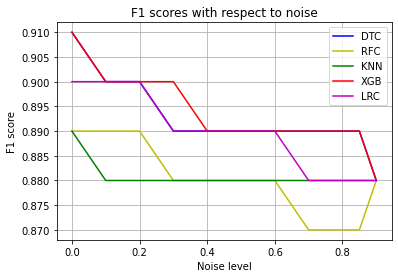

In [8]:
# Plotting the scored wrt noise levels

plt.plot(noice, dtc_test_scores, label='DTC', color='b')
plt.plot(noice, rfc_test_scores, label='RFC', color='y')
plt.plot(noice, knc_test_scores, label='KNN', color='g')
plt.plot(noice, xgb_test_scores, label='XGB', color='r')
plt.plot(noice, lr_test_scores, label='LRC', color='m')
plt.title('F1 scores with respect to noise')
plt.xlabel('Noise level')
plt.ylabel('F1 score')
plt.grid()
plt.legend()
plt.show()

In [9]:
# Filling nulls with mean value

dtc_test_scores = []
rfc_test_scores = []
xgb_test_scores = []
knc_test_scores = []
lr_test_scores = []
for n in tqdm(noice):
  new_X = create_nulls(X, n, random_state=42)
  new_X.fillna(new_X.mean(), inplace=True)
  X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.3)
  dtc.fit(X_train, y_train)
  rfc.fit(X_train, y_train)
  xgb.fit(X_train, y_train)
  knc.fit(X_train, y_train)
  lr.fit(X_train, y_train)
  dtc_test_score = get_test_acc(X_test, y_test, dtc)
  rfc_test_score = get_test_acc(X_test, y_test, rfc)
  xgb_test_score = get_test_acc(X_test, y_test, xgb)
  knc_test_score = get_test_acc(X_test, y_test, knc)
  lr_test_score = get_test_acc(X_test, y_test, lr)
  dtc_test_scores.append(dtc_test_score)
  rfc_test_scores.append(rfc_test_score)
  xgb_test_scores.append(xgb_test_score)
  knc_test_scores.append(knc_test_score)
  lr_test_scores.append(lr_test_score)

100%|██████████| 12/12 [02:06<00:00, 10.54s/it]


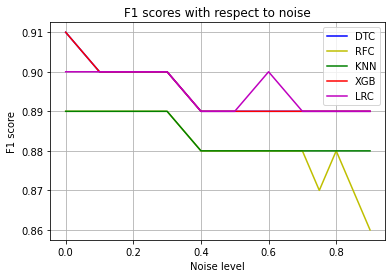

In [10]:
plt.plot(noice, dtc_test_scores, label='DTC', color='b')
plt.plot(noice, rfc_test_scores, label='RFC', color='y')
plt.plot(noice, knc_test_scores, label='KNN', color='g')
plt.plot(noice, xgb_test_scores, label='XGB', color='r')
plt.plot(noice, lr_test_scores, label='LRC', color='m')
plt.title('F1 scores with respect to noise')
plt.xlabel('Noise level')
plt.ylabel('F1 score')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Filling nulls with median value

dtc_test_scores = []
rfc_test_scores = []
xgb_test_scores = []
knc_test_scores = []
lr_test_scores = []
for n in tqdm(noice):
  new_X = create_nulls(X, n, random_state=42)
  new_X.fillna(new_X.median(), inplace=True)
  X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.3)
  dtc.fit(X_train, y_train)
  rfc.fit(X_train, y_train)
  xgb.fit(X_train, y_train)
  knc.fit(X_train, y_train)
  lr.fit(X_train, y_train)
  dtc_test_score = get_test_acc(X_test, y_test, dtc)
  rfc_test_score = get_test_acc(X_test, y_test, rfc)
  xgb_test_score = get_test_acc(X_test, y_test, xgb)
  knc_test_score = get_test_acc(X_test, y_test, knc)
  lr_test_score = get_test_acc(X_test, y_test, lr)
  dtc_test_scores.append(dtc_test_score)
  rfc_test_scores.append(rfc_test_score)
  xgb_test_scores.append(xgb_test_score)
  knc_test_scores.append(knc_test_score)
  lr_test_scores.append(lr_test_score)

100%|██████████| 12/12 [01:49<00:00,  9.09s/it]


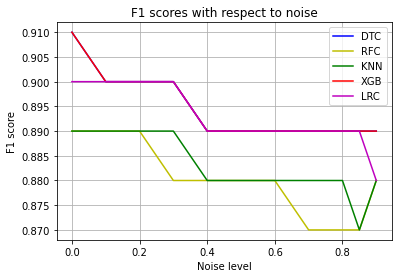

In [ ]:
plt.plot(noice, dtc_test_scores, label='DTC', color='b')
plt.plot(noice, rfc_test_scores, label='RFC', color='y')
plt.plot(noice, knc_test_scores, label='KNN', color='g')
plt.plot(noice, xgb_test_scores, label='XGB', color='r')
plt.plot(noice, lr_test_scores, label='LRC', color='m')
plt.title('F1 scores with respect to noise')
plt.xlabel('Noise level')
plt.ylabel('F1 score')
plt.grid()
plt.legend()
plt.show()